# Initialize

In [1]:
import numpy as np
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from io import StringIO
class SEIRModel:
    def __init__(self, population, beta, sigma, gamma):
        self.population = population
        self.beta = beta
        self.sigma = sigma
        self.gamma = gamma
        self.s = 100 
        self.e = 10
        self.i = 0
        self.r = 0

    def step(self):
        new_infections = self.beta * self.s * self.i / self.population
        new_exposed = new_infections
        new_recovered = self.gamma * self.i
        self.s -= new_infections
        self.e += new_exposed
        self.i += new_infections - new_recovered
        self.r += new_recovered

    def get_infected(self):
        return int(self.i)

    def __call__(self, y, t, N, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt
    
def load_df(data_name: str) -> pd.DataFrame:
    path = f"nb_datasets/{data_name}"

    df:pd.DataFrame = pd.read_csv(path)

    # ensure sort by date
    #df['date'] = pd.to_datetime(df['date'])
    df_sorted: pd.DataFrame = df.sort_values(by='date')

    df_sorted = df.sort_values("barangay_Res")
    keep_cols = ["date", "barangay_Res", "count_Exposed", "count_Infectious", "count_Recovered"]
    main_df: pd.DataFrame = df_sorted[df_sorted.columns.intersection(keep_cols)]
    # keep only san pedro as brgy
    res_df = main_df.loc[main_df['barangay_Res'] == 'San Pedro']
    
    res_df['date'] = pd.to_datetime(res_df['date'])
    
    return res_df


In [ ]:
# For entering the population of each barangay
data = """
Barangay	Population percentage (2020)	Population (2020)	Population (2015)	Change (2015‑2020)	Annual Population Growth Rate (2015‑2020)
Bagong Silang	1.76%	5,736	5,539	3.56%	0.74%
Calendola	1.16%	3,797	4,728	-19.69%	-4.51%
Chrysanthemum	3.81%	12,433	10,482	18.61%	3.66%
Cuyab	6.57%	21,422	21,731	-1.42%	-0.30%
Estrella	2.46%	8,025	7,478	7.31%	1.50%
Fatima	1.99%	6,491	8,704	-25.43%	-5.99%
G.S.I.S.	0.87%	2,828	2,867	-1.36%	-0.29%
Landayan	10.19%	33,235	31,407	5.82%	1.20%
Langgam	9.49%	30,946	29,625	4.46%	0.92%
Laram	2.00%	6,536	6,285	3.99%	0.83%
Magsaysay	3.92%	12,793	12,172	5.10%	1.05%
Maharlika	1.71%	5,580	6,343	-12.03%	-2.66%
Narra	0.70%	2,297	2,429	-5.43%	-1.17%
Nueva	1.31%	4,286	4,967	-13.71%	-3.06%
Pacita 1	6.93%	22,581	20,362	10.90%	2.20%
Pacita 2	3.68%	11,993	12,811	-6.39%	-1.38%
Poblacion	1.77%	5,771	5,890	-2.02%	-0.43%
Riverside	0.93%	3,028	3,226	-6.14%	-1.32%
Rosario	1.81%	5,911	5,613	5.31%	1.09%
Sampaguita Village	1.52%	4,941	5,733	-13.81%	-3.08%
San Antonio	18.21%	59,368	61,428	-3.35%	-0.72%
San Lorenzo Ruiz	1.78%	5,800	5,073	14.33%	2.86%
San Roque	2.20%	7,161	7,011	2.14%	0.45%
San Vicente	8.45%	27,561	26,129	5.48%	1.13%
Santo Nino	1.19%	3,892	4,172	-6.71%	-1.45%
United Bayanihan	1.65%	5,385	7,086	-24.01%	-5.61%
United Better Living	1.90%	6,204	6,518	-4.82%	-1.03%
"""

## Check if names are correct
# Create a DataFrame
df = pd.read_csv(StringIO(data), sep="\t")
df["Barangay"] = df["Barangay"].str.upper()

# Clean up the 'Population (2020)' column to remove commas and convert to integers
df["Population (2020)"] = df["Population (2020)"].str.replace(",", "").astype(int)

# Create a dictionary with Barangay as keys and Population (2020) as values
barangay_population_dict = df.set_index("Barangay")["Population (2020)"].to_dict()

# Print the dictionary
print(barangay_population_dict)


df = load_df("combined_san_pedro_actual_cases.csv")

name_list = df["barangay_Res"].unique().tolist()

print(f"br_list = {len(barangay_population_dict)} \nbr_df = {len(name_list)}")

# for b_name in barangay_population_dict:
#     if b_name not in name_list:
#         print(f"Wrong: {b_name}")
        

for brgy_name, brgy_pop in barangay_population_dict.items():
  print(f"{brgy_name}: {brgy_pop}")  

# Load df and data range

In [7]:
main_df = load_df('combined_san_pedro_actual_cases.csv')


start, cut1, cut2,  end = '2022-01-13', '2022-08-13', '2022-08-14', '2022-09-13'
train_data = main_df[(main_df['date'] >= start) & (main_df['date'] <= cut1)]
test_data = main_df[(main_df['date'] >= cut2) & (main_df['date'] <= end)]

total_data = main_df[(main_df['date'] >= start) & (main_df['date'] <= end)]

print(main_df.head())


      barangay_Res        date  count_Exposed  count_Infectious  \
32130    San Pedro  2020-05-08              5                 0   
32131    San Pedro  2020-05-09              6                 0   
32132    San Pedro  2020-05-10              7                 0   
32136    San Pedro  2020-05-14              7                 0   
32133    San Pedro  2020-05-11              7                 0   

       count_Recovered  
32130                0  
32131                0  
32132                0  
32136                0  
32133                0  


# Sim Anneal Code

In [4]:
# Simulate SEIR model
def simulate_seir(beta, sigma, gamma, y0, t, n):
    N = n
    seir_model = SEIRModel(N, beta, sigma, gamma)
    
    # Solve ODEs for SEIR
    result = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))
    S, E, I, R = result.T
    
    return S, E, I, R

# Objective function
def objective_function(params, observed_data, initial_conditions, time_points, n):
    beta, sigma, gamma = params

    # Simulate the SEIR model with given parameters
    s, predicted_E, predicted_I, predicted_R = simulate_seir(beta, sigma, gamma, initial_conditions, time_points, n)
    
    # Split observed data into compartments (only I for Infectious)
    observed_I = observed_data[:, 1]  # Only infectious data
    predicted_I = predicted_I  # Predicted infectious data
    
    # Calculate metrics for Infectious compartment
    mae = mean_absolute_error(observed_I, predicted_I)
    rmse = np.sqrt(mean_squared_error(observed_I, predicted_I))
    mse = mean_squared_error(observed_I, predicted_I)
    
    # Normalize metrics
    mae_normalized = mae / np.max(observed_I)  # Scale by max value
    rmse_normalized = rmse / np.max(observed_I)  # Scale by max value

    # Weighted average for Infectious compartment
    combined_metric = (0.3 * mae_normalized) + (0.7 * rmse_normalized)

    # For logging purposes
    total_mae = mae
    total_rmse = rmse
    
    # mse as objective
    return mse, total_mae, total_rmse

# Simulated Annealing for SEIR parameter tuning
def simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, n):
    # Initial parameter guesses
    current_params = [0.5, 0.5, 0.5]  # Initial guesses for beta, sigma, gamma
    current_cost, current_mae, current_rmse = objective_function(current_params, observed_data, initial_conditions, time_points, n)
    best_params = current_params
    best_mae, best_rmse = current_mae, current_rmse
    best_cost = current_cost
    
    #min_temp = 1e-5 
    initial_temp = temp
    
    for i in range(max_iter):
        # Generate new candidate parameters
        new_params = [param + random.uniform(-0.15, 0.15) for param in current_params]
        new_params = np.clip(new_params, 0, 0.9)  # Keep parameters in a valid range (0 to 1)        
        # Evaluate the new candidate solution
        new_cost, new_mae, new_rmse = objective_function(new_params, observed_data, initial_conditions, time_points, n)

        # ADJUST BASED ON METRIC
        # Decide whether to accept the new solution
        if new_cost < current_cost or random.random() < np.exp((current_cost - new_cost) / temp):
            current_params = new_params
            current_cost = new_cost
            
            # Update the best solution found so far
            if new_cost < best_cost:
                best_params = new_params
                best_cost = new_cost
                best_mae, best_rmse = new_mae, new_rmse

        # Cool down the temperature
        #temp = max(temp * cooling_rate, min_temp)  # Exponential decrease
        #temp = temp - (initial_temp / max_iter)  # Linear decrease
        temp = initial_temp / (1 + cooling_rate * i)  # Logarithmic decrease

    return best_params, best_mae, best_rmse

# Run Anneal Code

In [6]:
# function for running sim anneal
def run_anneal(observed_data):
  # Initial parameters

  N = 373000
  I0 = observed_data['count_Infectious'].iloc[0] # Initial infected from data
  E0 = observed_data['count_Exposed'].iloc[0] # Initial exposed cases
  R0 = observed_data['count_Recovered'].iloc[0] # Initial recovered
  S0 = N - I0 - E0 - R0  # Susceptible

  initial_conditions: tuple = [S0, E0, I0, R0]
    
  # Simulated Annealing parameters
  temp = 1500  
  cooling_rate = 0.99
  max_iter = 1500 
  time_points = np.arange(observed_data.shape[0]) # odeint expects an array (vector) of integers.
  
  observed_data = observed_data.to_numpy()
  
  best_params, best_mae, best_rmse = simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, N)

  return best_params, best_mae, best_rmse


# data to pass
observed_data = train_data[["count_Exposed", "count_Infectious", "count_Recovered"]]

best_params, best_mae, best_rmse = run_anneal(observed_data)

# results
o_beta, o_sigma, o_gamma = best_params
print(f"mae: {best_mae} \nrmse: {best_rmse}")
print(f"beta: {o_beta} \nsigma: {o_sigma} \ngamma: {o_gamma}")



mae: 172.80588954537296 
rmse: 325.9679435640888
beta: 0.528105385719227 
sigma: 0.10422101545858926 
gamma: 0.39158142348572134


# Actual and Predicted Comparison

mae: 172.80588954537296 
rmse: 325.9679435640888
beta: 0.528105385719227 
sigma: 0.10422101545858926 
gamma: 0.39158142348572134


C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\774991041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])
C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\774991041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'])
C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\774991041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

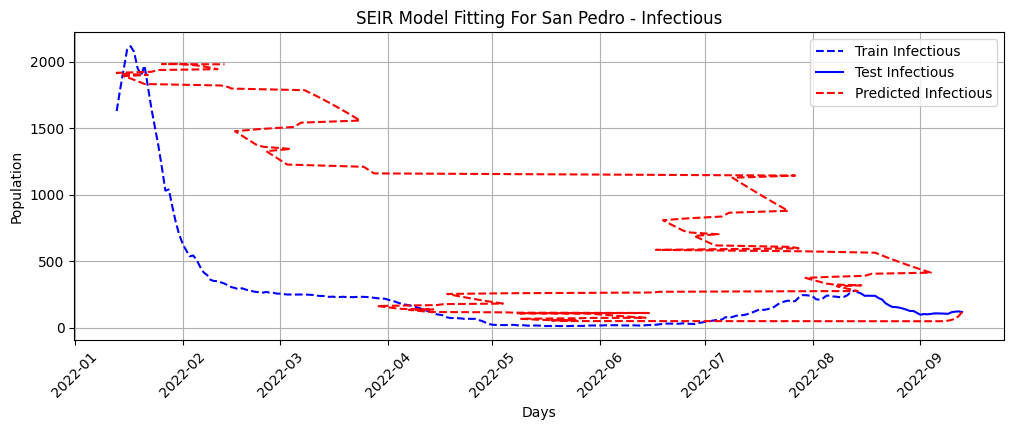

In [11]:


train_observed_data = train_data[["count_Exposed", "count_Infectious", "count_Recovered"]]
test_observed_data = test_data[["count_Exposed", "count_Infectious", "count_Recovered"]]

N = 373000
E0 = total_data['count_Exposed'].iloc[0] # Initial exposed cases
I0 = total_data['count_Infectious'].iloc[0] # Initial infected from data
R0 = total_data['count_Recovered'].iloc[0] # Initial recovered
S0 = N - E0 - I0 - R0  # Susceptible

initial_conditions: tuple = [S0, E0, I0, R0]
time_points = np.arange(total_data.shape[0]) # total_data is combined train and test 

try:
    # run seir with optimized params
    s, e, i, r = simulate_seir(o_beta, o_sigma, o_gamma, initial_conditions, time_points, N)

except Exception as e:
    print(f"Error processing: {e}")
    

# for plotting observed data
plot_actual = pd.DataFrame({
    'date_train': train_data['date'],
    'date_test': test_data['date'],
    'train_infectious': train_data['count_Infectious'],
    'test_infectious': test_data['count_Infectious'],
})    

# plot from prediction
plot_prediction = pd.DataFrame({
'date': total_data['date'],
'S': s,
'E': e,
'I': i,
'R': r
})  

# results
print(f"mae: {best_mae} \nrmse: {best_rmse}")
print(f"beta: {o_beta} \nsigma: {o_sigma} \ngamma: {o_gamma}")

plt.figure(figsize=(12, 4))
plt.plot(plot_actual['date_train'], plot_actual['train_infectious'], 'b--', label='Train Infectious')
plt.plot(plot_actual['date_test'], plot_actual['test_infectious'], 'b-', label='Test Infectious')
plt.plot(plot_prediction['date'], plot_prediction['I'], 'r--', label='Predicted Infectious')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=45)
plt.title(f'SEIR Model Fitting For San Pedro - Infectious')
plt.grid(True)
plt.show()

In [10]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
total_data['date'] = pd.to_datetime(total_data['date'])
# for plotting observed data
plot_actual = pd.DataFrame({
    'date_train': train_data['date'],
    'date_test': test_data['date'],
    'train_infectious': train_data['count_Infectious'],
    'test_infectious': test_data['count_Infectious'],
})   
print(plot_actual.dtypes)

date_train          datetime64[ns]
date_test           datetime64[ns]
train_infectious           float64
test_infectious            float64
dtype: object


C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\3193475202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])
C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\3193475202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'])
C:\Users\pc-user\AppData\Local\Temp\ipykernel_10476\3193475202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .